# Combined Cycle Power Plant Regression Project

This project uses the Combined Cycle Power Plant data set to find models using different types of regression, namely multiple linear regression, polynomial regression, support vector regression, decision tree regression, and random forest regression. The aim of this project is to find which type of regression provides the best accuracy, and which type of regression suits this data set.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

## Importing the dataset

In [2]:
df = pd.read_excel('data.xlsx')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Data Description

### Checking for missing data

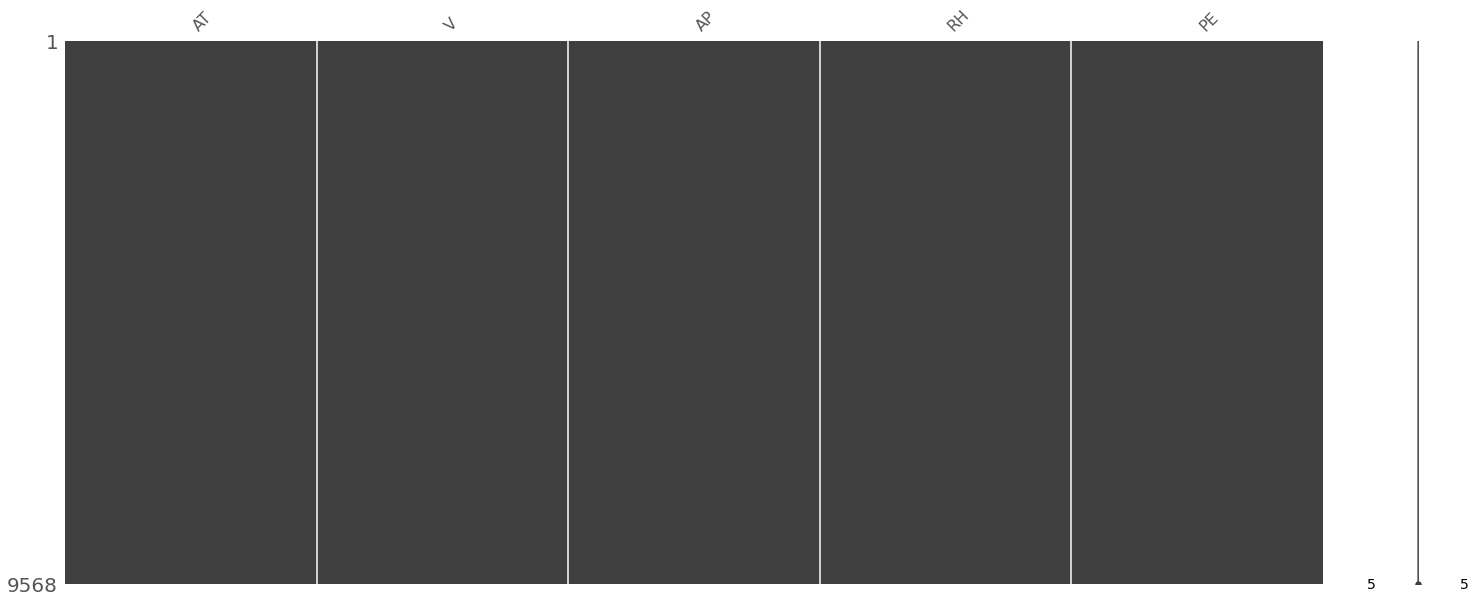

In [3]:
from missingno import matrix

matrix(df);

Therefore, there is no missing data.

### Inspecting first 5 rows

In [4]:
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


### Boxplots

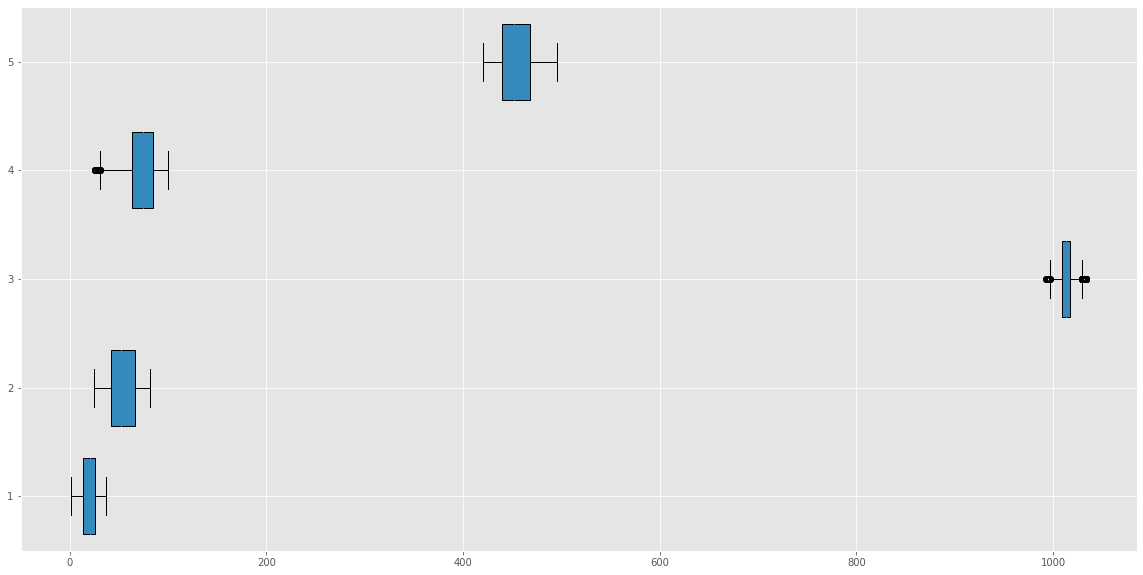

In [6]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.boxplot(df, vert=False, widths=0.7, patch_artist=True, autorange=True, manage_ticks=True);

## Splitting the df into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## Multiple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

multiple = LinearRegression()
multiple.fit(X_train, y_train)

y_pred = multiple.predict(X_test)

print('Observation \t Actual \t Predicted')
print()
for i in range(len(y_pred)):
    print(f"{i+1} \t\t {'%.2f' % y_test[i]} \t {'%.2f' % y_pred[i]}")

Observation 	 Actual 	 Predicted

1 		 455.41 	 447.85
2 		 441.64 	 437.90
3 		 471.63 	 471.87
4 		 479.86 	 480.91
5 		 449.65 	 443.91
6 		 460.87 	 460.71
7 		 479.58 	 474.04
8 		 437.79 	 437.80
9 		 431.00 	 432.18
10 		 442.54 	 441.46
11 		 486.11 	 479.89
12 		 457.59 	 461.42
13 		 442.12 	 441.97
14 		 461.35 	 469.94
15 		 464.23 	 466.39
16 		 468.40 	 462.76
17 		 470.92 	 469.36
18 		 481.30 	 473.31
19 		 432.49 	 425.10
20 		 449.88 	 444.05
21 		 420.26 	 446.31
22 		 441.76 	 447.59
23 		 441.32 	 438.51
24 		 443.93 	 447.18
25 		 451.88 	 449.48
26 		 434.65 	 437.10
27 		 440.87 	 436.44
28 		 485.60 	 479.47
29 		 450.69 	 446.62
30 		 444.62 	 446.10
31 		 455.53 	 454.96
32 		 465.42 	 462.55
33 		 452.52 	 457.52
34 		 479.94 	 479.24
35 		 447.96 	 448.74
36 		 446.23 	 446.81
37 		 465.15 	 472.63
38 		 480.48 	 477.19
39 		 477.67 	 476.15
40 		 442.50 	 444.06
41 		 432.33 	 429.14
42 		 450.92 	 447.47
43 		 444.59 	 443.94
44 		 473.51 	 469.48
45 		 4

### Multiple Linear Regression Model Accuracy

In [9]:
from sklearn.metrics import r2_score

multiple_r2 = r2_score(y_test, y_pred)
print("R-squared Value: %.4f" % multiple_r2)

R-squared Value: 0.9235


## Polynomial Linear Regression

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
polynomial = LinearRegression()
polynomial.fit(X_poly, y_train)

y_pred = polynomial.predict(poly_reg.transform(X_test))

print('Observation \t Actual \t Predicted')
print()
for i in range(len(y_pred)):
    print(f"{i+1} \t\t {'%.2f' % y_test[i]} \t {'%.2f' % y_pred[i]}")

Observation 	 Actual 	 Predicted

1 		 455.41 	 449.78
2 		 441.64 	 440.66
3 		 471.63 	 468.29
4 		 479.86 	 480.76
5 		 449.65 	 443.90
6 		 460.87 	 461.14
7 		 479.58 	 474.70
8 		 437.79 	 437.06
9 		 431.00 	 433.69
10 		 442.54 	 441.21
11 		 486.11 	 482.44
12 		 457.59 	 460.96
13 		 442.12 	 442.29
14 		 461.35 	 471.59
15 		 464.23 	 464.71
16 		 468.40 	 460.41
17 		 470.92 	 470.15
18 		 481.30 	 474.38
19 		 432.49 	 431.32
20 		 449.88 	 443.05
21 		 420.26 	 445.87
22 		 441.76 	 443.57
23 		 441.32 	 438.70
24 		 443.93 	 445.42
25 		 451.88 	 447.50
26 		 434.65 	 437.24
27 		 440.87 	 439.08
28 		 485.60 	 482.09
29 		 450.69 	 445.15
30 		 444.62 	 445.30
31 		 455.53 	 454.06
32 		 465.42 	 460.04
33 		 452.52 	 456.47
34 		 479.94 	 478.77
35 		 447.96 	 450.06
36 		 446.23 	 443.46
37 		 465.15 	 473.04
38 		 480.48 	 480.32
39 		 477.67 	 477.37
40 		 442.50 	 442.14
41 		 432.33 	 433.08
42 		 450.92 	 446.28
43 		 444.59 	 443.44
44 		 473.51 	 468.40
45 		 4

1321 		 460.76 	 454.28
1322 		 432.53 	 434.38
1323 		 472.54 	 471.93
1324 		 441.29 	 442.25
1325 		 441.18 	 438.19
1326 		 458.64 	 456.66
1327 		 437.01 	 434.08
1328 		 435.95 	 438.14
1329 		 449.91 	 445.86
1330 		 445.49 	 445.31
1331 		 444.55 	 451.42
1332 		 438.80 	 434.83
1333 		 432.38 	 433.25
1334 		 474.16 	 476.76
1335 		 456.34 	 459.32
1336 		 440.95 	 447.97
1337 		 480.05 	 477.87
1338 		 487.18 	 485.10
1339 		 459.12 	 455.74
1340 		 454.36 	 454.67
1341 		 448.49 	 451.73
1342 		 451.14 	 450.82
1343 		 426.13 	 434.17
1344 		 432.41 	 433.88
1345 		 447.73 	 449.39
1346 		 444.61 	 444.70
1347 		 470.92 	 470.69
1348 		 468.19 	 467.31
1349 		 466.64 	 465.86
1350 		 436.69 	 438.61
1351 		 446.29 	 450.29
1352 		 465.58 	 466.24
1353 		 469.08 	 473.32
1354 		 471.83 	 470.30
1355 		 460.61 	 463.15
1356 		 453.12 	 450.99
1357 		 457.80 	 448.06
1358 		 444.26 	 445.39
1359 		 445.09 	 447.61
1360 		 432.82 	 434.64
1361 		 491.10 	 483.58
1362 		 484.05 	

### Polynomial Linear Regression Model Accuracy

In [11]:
from sklearn.metrics import r2_score

polynomial_r2 = r2_score(y_test, y_pred)
print("R-squared Value: %.4f" % polynomial_r2)

R-squared Value: 0.9391


## Support Vector Regression

In [12]:
from sklearn.preprocessing import StandardScaler

y_train_ = y_train.reshape(-1, 1)
y_test_ = y_test.reshape(-1, 1)

sc_X = StandardScaler()
sc_y = StandardScaler()

X_train_ = sc_X.fit_transform(X_train)
y_train_ = sc_y.fit_transform(y_train_)

In [13]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf') # Radial Basis Function (RBF) - Most common SVR kernal
svr.fit(X_train_, y_train_)

y_pred = sc_y.inverse_transform(svr.predict(sc_X.transform(X_test)))

print('Observation \t Actual \t Predicted')
print()
for i in range(len(y_pred)):
    print(f"{i+1} \t\t {'%.2f' % y_test[i]} \t {'%.2f' % y_pred[i]}")

Observation 	 Actual 	 Predicted

1 		 455.41 	 451.48
2 		 441.64 	 441.00
3 		 471.63 	 468.98
4 		 479.86 	 481.13
5 		 449.65 	 443.72
6 		 460.87 	 461.19
7 		 479.58 	 474.60
8 		 437.79 	 437.11
9 		 431.00 	 432.83
10 		 442.54 	 440.41
11 		 486.11 	 484.23
12 		 457.59 	 460.81
13 		 442.12 	 442.87
14 		 461.35 	 472.32
15 		 464.23 	 464.20
16 		 468.40 	 462.32
17 		 470.92 	 470.89
18 		 481.30 	 474.71
19 		 432.49 	 432.59
20 		 449.88 	 443.38
21 		 420.26 	 446.14
22 		 441.76 	 443.23
23 		 441.32 	 438.86
24 		 443.93 	 445.69
25 		 451.88 	 448.56
26 		 434.65 	 436.96
27 		 440.87 	 440.39
28 		 485.60 	 483.93
29 		 450.69 	 445.31
30 		 444.62 	 445.45
31 		 455.53 	 453.91
32 		 465.42 	 460.54
33 		 452.52 	 456.23
34 		 479.94 	 479.30
35 		 447.96 	 449.28
36 		 446.23 	 444.17
37 		 465.15 	 472.89
38 		 480.48 	 481.93
39 		 477.67 	 478.07
40 		 442.50 	 442.10
41 		 432.33 	 432.13
42 		 450.92 	 446.95
43 		 444.59 	 443.86
44 		 473.51 	 467.99
45 		 4

### Support Vector Regression Model Accuracy

In [14]:
from sklearn.metrics import r2_score

svr_r2 = r2_score(y_test, y_pred)
print("R-squared Value: %.4f" % svr_r2)

R-squared Value: 0.9411


## Decision Tree Regression

In [15]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=123)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print('Observation \t Actual \t Predicted')
print()
for i in range(len(y_pred)):
    print(f"{i+1} \t\t {'%.2f' % y_test[i]} \t {'%.2f' % y_pred[i]}")

Observation 	 Actual 	 Predicted

1 		 455.41 	 458.31
2 		 441.64 	 439.74
3 		 471.63 	 468.54
4 		 479.86 	 478.95
5 		 449.65 	 451.28
6 		 460.87 	 458.46
7 		 479.58 	 477.91
8 		 437.79 	 439.67
9 		 431.00 	 434.45
10 		 442.54 	 442.78
11 		 486.11 	 483.00
12 		 457.59 	 439.21
13 		 442.12 	 442.77
14 		 461.35 	 466.91
15 		 464.23 	 464.30
16 		 468.40 	 464.45
17 		 470.92 	 474.28
18 		 481.30 	 465.43
19 		 432.49 	 432.85
20 		 449.88 	 439.63
21 		 420.26 	 444.35
22 		 441.76 	 441.00
23 		 441.32 	 436.84
24 		 443.93 	 451.96
25 		 451.88 	 450.46
26 		 434.65 	 434.65
27 		 440.87 	 440.87
28 		 485.60 	 483.71
29 		 450.69 	 451.03
30 		 444.62 	 447.30
31 		 455.53 	 457.03
32 		 465.42 	 463.99
33 		 452.52 	 455.30
34 		 479.94 	 478.45
35 		 447.96 	 443.67
36 		 446.23 	 453.58
37 		 465.15 	 478.66
38 		 480.48 	 480.15
39 		 477.67 	 473.31
40 		 442.50 	 437.03
41 		 432.33 	 429.41
42 		 450.92 	 451.79
43 		 444.59 	 448.19
44 		 473.51 	 472.43
45 		 4

### Decision Tree Regression Model Accuracy

In [16]:
from sklearn.metrics import r2_score

dt_r2 = r2_score(y_test, y_pred)
print("R-squared Value: %.4f" % dt_r2)

R-squared Value: 0.9344


## Random Forest Regression

In [17]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=123)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Observation \t Actual \t Predicted')
print()
for i in range(len(y_pred)):
    print(f"{i+1} \t\t {'%.2f' % y_test[i]} \t {'%.2f' % y_pred[i]}")

Observation 	 Actual 	 Predicted

1 		 455.41 	 455.37
2 		 441.64 	 441.20
3 		 471.63 	 468.47
4 		 479.86 	 479.25
5 		 449.65 	 449.17
6 		 460.87 	 458.79
7 		 479.58 	 478.91
8 		 437.79 	 438.24
9 		 431.00 	 433.31
10 		 442.54 	 441.31
11 		 486.11 	 477.49
12 		 457.59 	 459.31
13 		 442.12 	 443.85
14 		 461.35 	 462.67
15 		 464.23 	 465.12
16 		 468.40 	 465.14
17 		 470.92 	 471.39
18 		 481.30 	 477.82
19 		 432.49 	 431.59
20 		 449.88 	 444.88
21 		 420.26 	 441.70
22 		 441.76 	 442.21
23 		 441.32 	 441.19
24 		 443.93 	 446.52
25 		 451.88 	 451.44
26 		 434.65 	 436.13
27 		 440.87 	 440.53
28 		 485.60 	 482.32
29 		 450.69 	 446.83
30 		 444.62 	 447.63
31 		 455.53 	 455.43
32 		 465.42 	 463.74
33 		 452.52 	 456.56
34 		 479.94 	 479.29
35 		 447.96 	 450.79
36 		 446.23 	 447.70
37 		 465.15 	 474.83
38 		 480.48 	 480.99
39 		 477.67 	 476.57
40 		 442.50 	 440.93
41 		 432.33 	 431.43
42 		 450.92 	 444.43
43 		 444.59 	 443.85
44 		 473.51 	 473.24
45 		 4

### Random Forest Regression Model Accuracy

In [18]:
from sklearn.metrics import r2_score

rf_r2 = r2_score(y_test, y_pred)
print("R-squared Value: %.4f" % rf_r2)

R-squared Value: 0.9576


## Comparing Model Accuracies

In [19]:
print("The R^2 values of the following regressions are:")
print(f'Multiple Linear Regression     %.4f' % multiple_r2)
print(f'Polynomial Regression          %.4f' % polynomial_r2)
print(f'Support Vector Regression      %.4f' % svr_r2)
print(f'Decision Tree Regression       %.4f' % dt_r2)
print(f'Random Forest Regression       %.4f' % rf_r2)

The R^2 values of the following regressions are:
Multiple Linear Regression     0.9235
Polynomial Regression          0.9391
Support Vector Regression      0.9411
Decision Tree Regression       0.9344
Random Forest Regression       0.9576


Therefore, Random Forest Regression was the best in this case.